In [4]:
import os
import zipfile



In [5]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse36-4.png', 'horse19-7.png', 'horse46-8.png', 'horse29-0.png', 'horse24-2.png', 'horse26-6.png', 'horse07-2.png', 'horse37-4.png', 'horse34-0.png', 'horse04-9.png']
['human02-12.png', 'human09-27.png', 'human14-15.png', 'human10-15.png', 'human02-19.png', 'human13-16.png', 'human06-00.png', 'human13-08.png', 'human07-14.png', 'human07-07.png']


The total number of horse and human images in the directories:

In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


nrows = 4
ncols = 4


pic_index = 0

display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

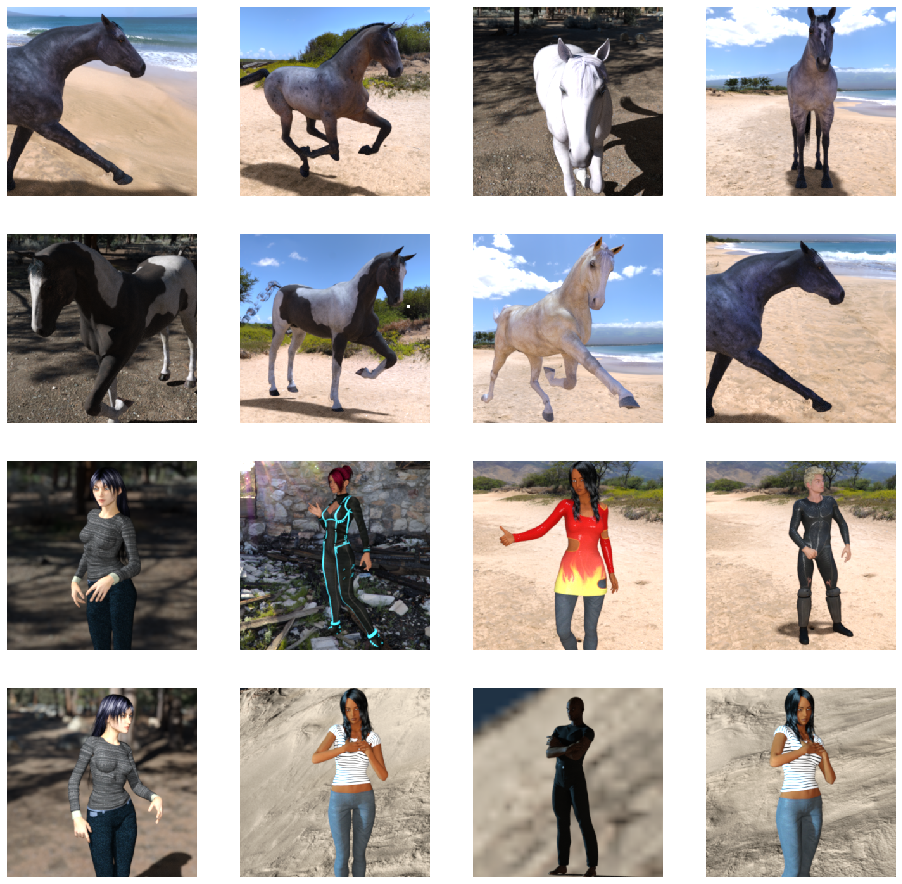

In [9]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):

    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


## Building a Small Model from Scratch



In [10]:
import tensorflow as tf

Finally we add the densely connected layers. 



In [11]:
model = tf.keras.models.Sequential([
    #The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

prints a summary of the NN 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing



In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'horse-or-human/', 
        target_size=(300, 300), 
        batch_size=128,
        class_mode='binary')


Found 1027 images belonging to 2 classes.


### Training
Train for 15 epochs -- this may take a few minutes to run.




In [17]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 72s 9s/step - loss: 0.7678 - acc: 0.5050
Epoch 2/15
8/8 [==============================] - 78s 10s/step - loss: 0.7508 - acc: 0.6630
Epoch 3/15
8/8 [==============================] - 87s 11s/step - loss: 0.3626 - acc: 0.8665
Epoch 4/15
8/8 [==============================] - 96s 12s/step - loss: 0.2708 - acc: 0.8916
Epoch 5/15
8/8 [==============================] - 68s 9s/step - loss: 0.2570 - acc: 0.9199
Epoch 6/15
8/8 [==============================] - 91s 11s/step - loss: 0.4938 - acc: 0.8574
Epoch 7/15
8/8 [==============================] - 66s 8s/step - loss: 0.1439 - acc: 0.9328
Epoch 8/15
8/8 [==============================] - 88s 11s/step - loss: 0.0636 - acc: 0.9717
Epoch 9/15
8/8 [==============================] - 74s 9s/step - loss: 1.2659 - acc: 0.8354
Epoch 10/15
8/8 [==============================] - 79s 10s/step - loss: 0.2398 - acc: 0.9555
Epoch 11/15
8/8 [==============================] - 78s 10s/step - loss: 0.1028 - ac

### Running the Model



In [25]:
import numpy as np

from keras.preprocessing import image


     # predicting images
path = 'horse-or-human/horses/horse01-4.png' 
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is a human")
else:
    print(" is a horse")


[0.]
 is a horse


### Visualizing Intermediate Representations



/home/bharat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


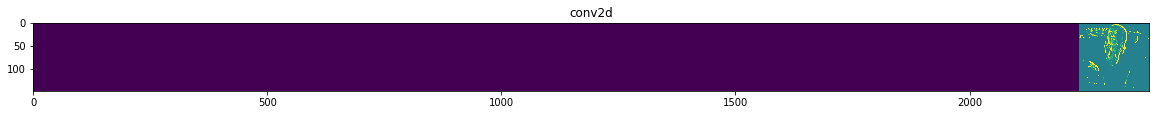

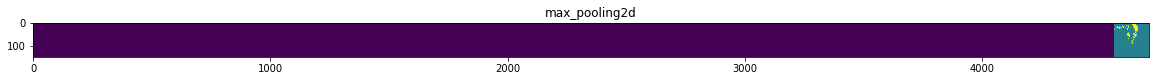

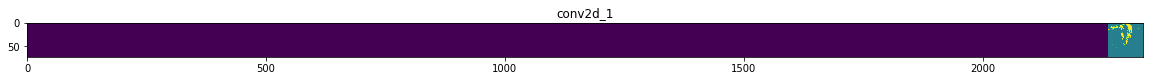

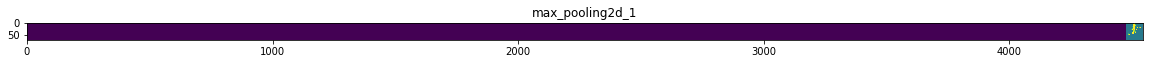

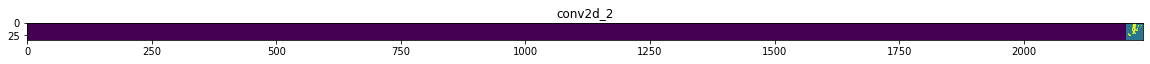

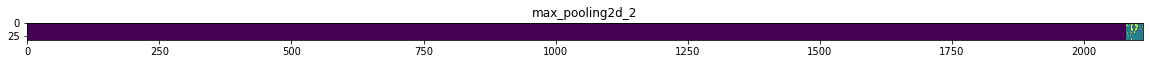

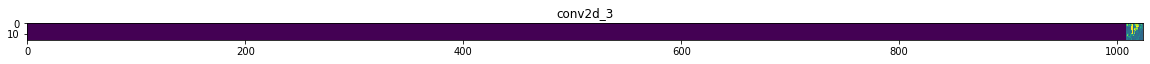

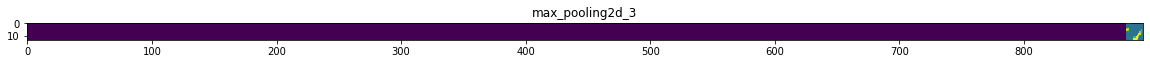

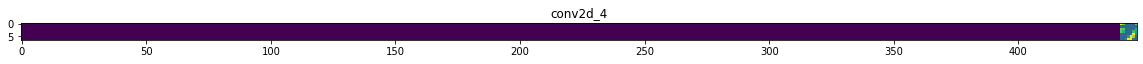

In [26]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) 
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) 

x /= 255


successive_feature_maps = visualization_model.predict(x)


layer_names = [layer.name for layer in model.layers]


for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:

        n_features = feature_map.shape[-1] 
        size = feature_map.shape[1]

        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')

        display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up



In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)